# Simple Linear Regression

In [43]:
import pandas as pd

In [44]:
ad=pd.read_csv("Advertising.csv",usecols=[1,2,3,4])
df=ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [47]:
df.isnull().values.any()

np.False_

In [48]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [49]:
import seaborn as sns

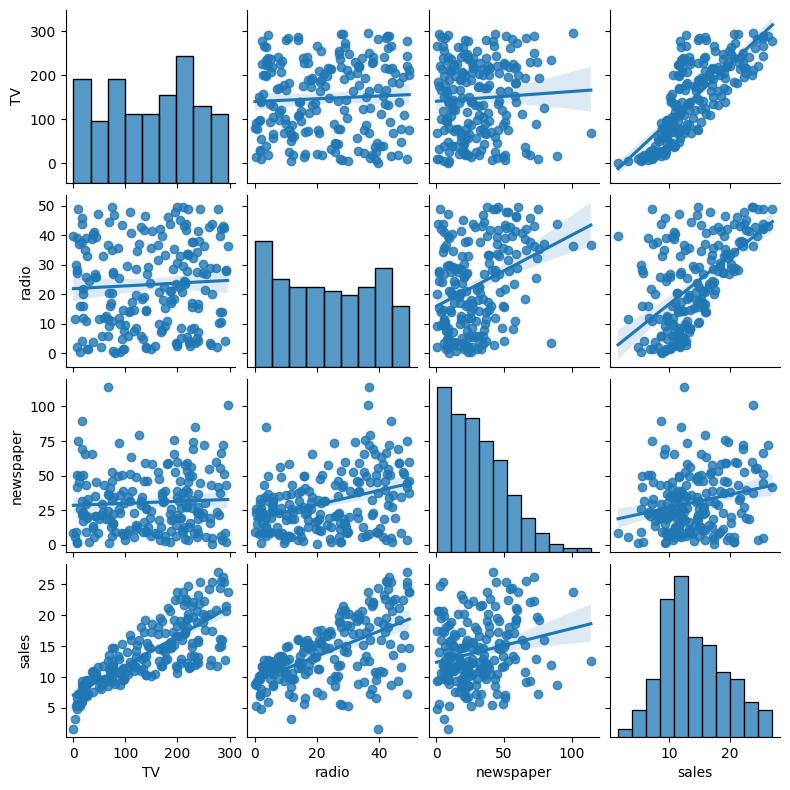

In [50]:
sns.pairplot(df,kind="reg",height=2)

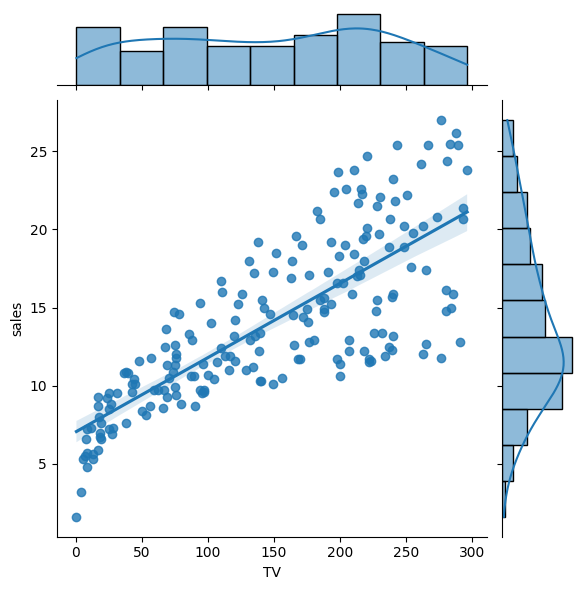

In [51]:
sns.jointplot(x="TV",y="sales",data=df,kind="reg")

#### Modeling with Statsmodels

In [52]:
import statsmodels.api as sm

In [53]:
x=df[["TV"]]
x[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [54]:
x=sm.add_constant(x)

In [55]:
x.head()

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [56]:
y=df["sales"]

In [57]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [58]:
lm=sm.OLS(y,x)

In [59]:
model=lm.fit()

In [60]:
model

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           1.47e-42
Time:                        16:36:48   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV",df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           1.47e-42
Time:                        16:36:48   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [64]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [65]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [66]:
model.f_pvalue

np.float64(1.4673897001945906e-42)

In [67]:
print("f_pvalue : ","%.4f"%model.f_pvalue)

f_pvalue :  0.0000


In [68]:
model.fvalue

np.float64(312.144994372713)

In [69]:
model.tvalues

Intercept    15.360275
TV           17.667626
dtype: float64

In [70]:
model.mse_model

np.float64(3314.618166868649)

In [71]:
model.rsquared

np.float64(0.611875050850071)

In [72]:
model.rsquared_adj

np.float64(0.6099148238341623)

In [73]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [74]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [75]:
print("sales = "+ str("%.2f" % model.params[0]) + "+ TV" + "*" + str("%.2f" % model.params[1]))

sales = 7.03+ TV*0.05


C:\Users\veyse\AppData\Local\Temp\ipykernel_13316\572432543.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("sales = "+ str("%.2f" % model.params[0]) + "+ TV" + "*" + str("%.2f" % model.params[1]))


In [76]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

## Simple linear regression estimation

#### Model Equation

Sales = 7.03+TV*0.05

**For example, what would be the predicted sales value if there is 30 units of TV advertising expenditure?**

In [77]:
7.03+30*0.04

8.23

In [79]:
from sklearn.linear_model import LinearRegression
X=df[["TV"]]
y=df["sales"]
reg=LinearRegression()
model=reg.fit(X,y)

In [80]:
model.predict([[30]])

C:\Users\veyse\anaconda3\envs\WebScraping\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.45869276])

In [83]:
new_data=[[5],[90],[200]]

In [84]:
model.predict(new_data)

C:\Users\veyse\anaconda3\envs\WebScraping\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 7.27027675, 11.31089119, 16.53992164])

In [85]:
tv_values = [[i] for i in range(10, 101, 10)]
predictions = model.predict(tv_values)
for tv, prediction in zip(tv_values, predictions):
    print(f"TV Expenditure: {tv[0]} - Predicted Sales: {prediction:.2f}")

TV Expenditure: 10 - Predicted Sales: 7.51
TV Expenditure: 20 - Predicted Sales: 7.98
TV Expenditure: 30 - Predicted Sales: 8.46
TV Expenditure: 40 - Predicted Sales: 8.93
TV Expenditure: 50 - Predicted Sales: 9.41
TV Expenditure: 60 - Predicted Sales: 9.88
TV Expenditure: 70 - Predicted Sales: 10.36
TV Expenditure: 80 - Predicted Sales: 10.84
TV Expenditure: 90 - Predicted Sales: 11.31
TV Expenditure: 100 - Predicted Sales: 11.79


C:\Users\veyse\anaconda3\envs\WebScraping\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
